# Finding Heavy Traffic Indicators on I-94

## Introduction

In this project, we are going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available, and it can be downloaded from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php).

The aim of our investigation is to identify a few indicators of heavy traffic on I-94. These indicators can include weather, time of day, weekday, and so on. For example, we may discover that traffic is typically heavier in the summer or when it snows.

# The I-94 Traffic Dataset

First, let's read in the dataset and explore the first and last 5 rows.

In [1]:
import pandas as pd

i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In this dataset, there are a total of 9 columns and 48204 rows. None of the rows have null values with a mixture of float, integer and object `data types`. The date_time column shows that the record starts from 2012-10-02 09:00:00 and 2018-09-30 23:00:00. Each row describes traffic and weather data for a specific hour.

## Analyzing Traffic Volume

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

Therefore, our analysis will only be on the westbound traffic in the proximity of that station, and we should avoid generalizing the results of our findings on the entire I-94 highway.

Next, let's plot a histogram and get the statistics of the `traffic_volume` column to analyze it effectively.

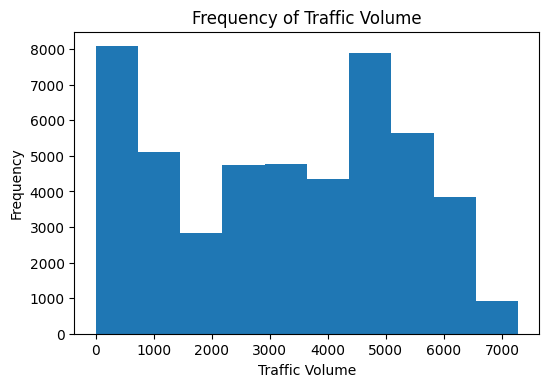

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i94['traffic_volume'].plot.hist()
plt.title('Frequency of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.show()

In [5]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the histogram we generated for the traffic_volume column, we observe the following:

- Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars per hour.
- About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- However, about 25% of the time, the traffic volume was 4,933 cars or more (about four times as much).

Based on our observation, nighttime and daytime traffic volumes may influence each other. Therefore, let's compare these next.

## Traffic Volume: Day vs. Night

We can analyze daytime and nighttime data by splitting the dataset into two parts:
- Hours from 7 a.m. to 7 p.m. (12 hours)
- Hours from 7 p.m. to 7 a.m. (12 hours)

To do this, we can start by converting the data in the `date_time` column to a *datetime* data type.

In [6]:
i94['date_time'] = pd.to_datetime(i94['date_time'])
i94['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

Next, we can isolate the hour and then split the data into daytime hours and nighttime hours.

In [7]:
day_time = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour <19)]
day_time['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48194   2018-09-30 15:00:00
48195   2018-09-30 15:00:00
48196   2018-09-30 16:00:00
48197   2018-09-30 17:00:00
48198   2018-09-30 18:00:00
Name: date_time, Length: 23877, dtype: datetime64[ns]

In [8]:
day_time.shape

(23877, 9)

In [9]:
night_time = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour <7)]
night_time['date_time']

10      2012-10-02 19:00:00
11      2012-10-02 20:00:00
12      2012-10-02 21:00:00
13      2012-10-02 22:00:00
14      2012-10-02 23:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 24327, dtype: datetime64[ns]

In [10]:
night_time.shape

(24327, 9)

There are 23877 Daytime data points and 24327 Nighttime data points.

Next, we can plot a histogram for `traffic_volume` using the daytime and nighttime plots separately and display them next to one another for easier analysis.

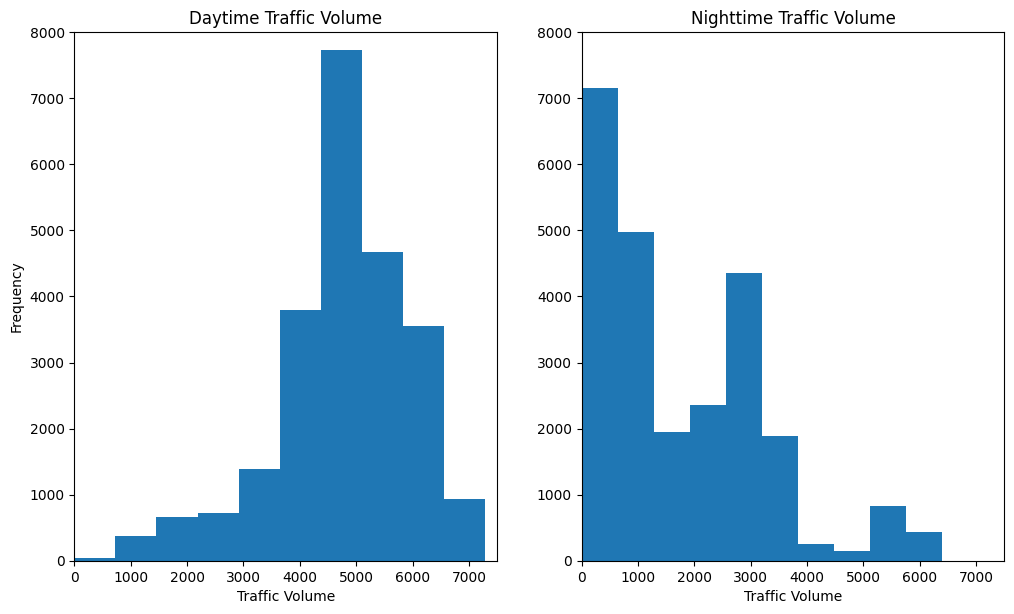

In [11]:
plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
plt.hist(day_time['traffic_volume'])
plt.xlim([0, 7500])
plt.ylim([0, 8000])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(night_time['traffic_volume'])
plt.xlim([0, 7500])
plt.ylim([0, 8000])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')

plt.show()

In [12]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime histogram is leftskewed; most of the values pile up on the right side of the histogram and the median is higher than the mean. The nighttime histogram is rightskewed; most of the values pile up on the left side of the histogram and the mean is higher than the median.

Traffic at night is light compared to the daytime when you look at the averages and our goal is to find the indicators of heavy traffic, so we will be using the daytime data going forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Time of day

### Month

We can start with checking traffic volume by month, and plotting a line graph to visualize the data.

In [14]:
day_time['month'] = day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

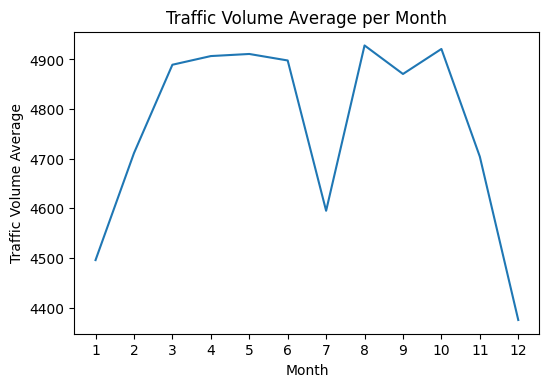

In [15]:
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume Average per Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume Average')
plt.xticks(range(1,13))
plt.show()

We can see from the line graph that the traffic volume has high averages from March to June and August to October. These months are usually warmer. However, July has a much lower traffic volume, which seems odd. On the other hand, the colder months from November to Febuary have a lower traffic volume average.

Now that we looked at how traffic volume averages change with each month, let's look at another time unit: the day of the week.

### Day of Week

In [16]:
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

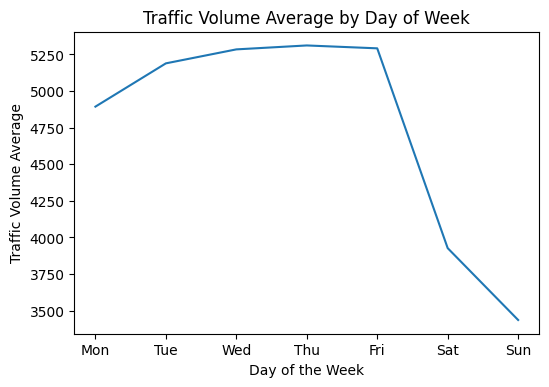

In [17]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume Average by Day of Week')
plt.xlabel('Day of the Week')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Traffic Volume Average')
plt.show()

From line plot above, we observe that the traffic volume is significantly heavier on business days compared to the weekends.

Now that we found that the traffic volume average is lower on weekends, we will compare different times of day.

### Time of Day

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [18]:
day_time['hour'] = day_time['date_time'].dt.hour
business_days = day_time.copy()[day_time['dayofweek'] <= 4] # 4 is Friday
weekend = day_time.copy()[day_time['dayofweek'] >= 5] # 5 is Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print('Business days:')
print(by_hour_business['traffic_volume'])
print('\nWeekends:')
print(by_hour_weekend['traffic_volume'])

Business days:
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

Weekends:
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


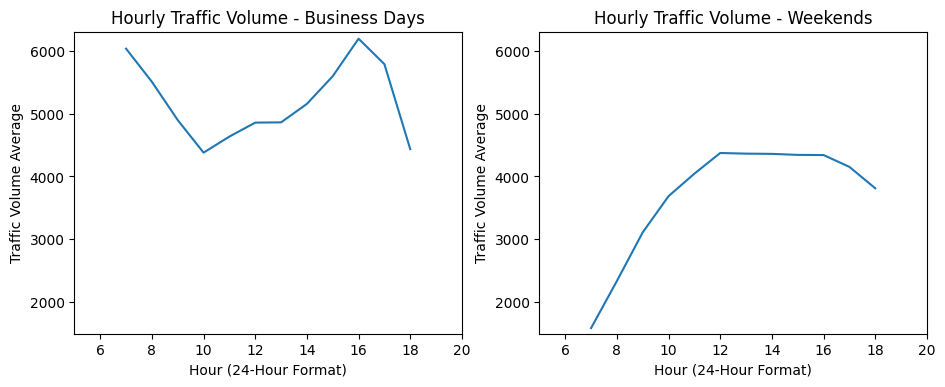

In [19]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(5, 20)
plt.ylim(1500, 6300)
plt.title('Hourly Traffic Volume - Business Days')
plt.xlabel('Hour (24-Hour Format)')
plt.ylabel('Traffic Volume Average')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(5, 20)
plt.ylim(1500, 6300)
plt.title('Hourly Traffic Volume - Weekends')
plt.xlabel('Hour (24-Hour Format)')
plt.ylabel('Traffic Volume Average')

plt.show()

At each hour of the day, the traffic volume is higher during business days compared to the weekends.

On business days, the traffic is the highest around 7:00am and 4:00pm, which are the rush hours since most people are travelling from home to work/schoole and from work/school back home, respectively.

On weekends, the traffic volume is highest between 12:00pm and 4:00pm. This might be because people go out during that time on weekends.

In summary, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October except July) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7:00am and 4:00pm.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [20]:
day_time.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Of all the weather columns, `temp` shows the strongest correlation of +0.13 with `traffic volume`.

Lets plot the scatter plot for `temp` and `traffic_volume`.

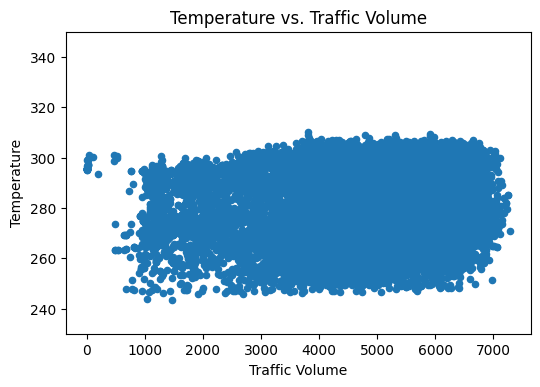

In [21]:
day_time.plot.scatter('traffic_volume', 'temp')
plt.title('Temperature vs. Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.ylim(230, 350)
plt.show()

Although the temperature column shows the strongest correlation with traffic volume among other numerical weather columns, it does not seem to be a solid indicator of heavy traffic. We need further look at other weather-related columns: `weather_main` and `weather_description`.

## Weather Types

Previously, we examined the correlation between `traffic_volume` and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns, and then we will create a bar plot for each.

In [22]:
by_weather_main = day_time.groupby('weather_main').mean()
by_weather_description = day_time.groupby('weather_description').mean()

print(by_weather_main['traffic_volume'].sort_values())
print("")
print(by_weather_description['traffic_volume'].sort_values())

weather_main
Squall          4211.000000
Fog             4372.491713
Snow            4396.321183
Smoke           4564.583333
Haze            4609.893285
Mist            4623.976475
Thunderstorm    4648.212860
Clear           4778.416260
Rain            4815.568462
Drizzle         4837.212911
Clouds          4865.415996
Name: traffic_volume, dtype: float64

weather_description
thunderstorm with drizzle              2297.000000
snow                                   4054.065693
SQUALLS                                4211.000000
sleet                                  4312.666667
freezing rain                          4314.000000
thunderstorm with light rain           4336.130435
fog                                    4372.491713
heavy snow                             4411.681250
light snow                             4430.858896
proximity thunderstorm with rain       4501.611111
thunderstorm with rain                 4522.950000
thunderstorm with heavy rain           4555.760000
light int

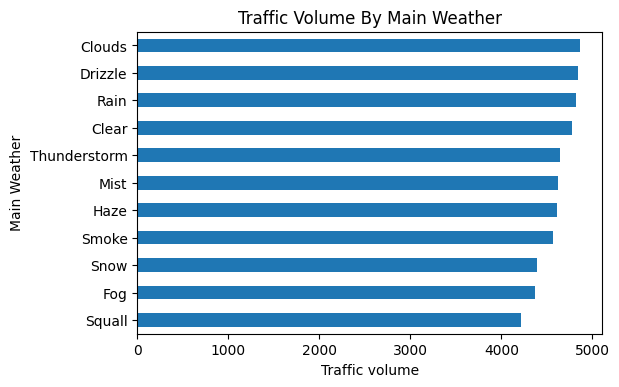

In [23]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.title('Traffic Volume By Main Weather')
plt.xlabel('Traffic volume')
plt.ylabel('Main Weather')
plt.show()

From bar plot above, we can see that there are no main weather indicators causing a traffic volume exceeding 5000 cars. Therefore, it is difficult to pinpoint a heavy traffic indicator from main weather. However, certain weather conditions lower traffic volumes by a bit, such as Squall and Fog.

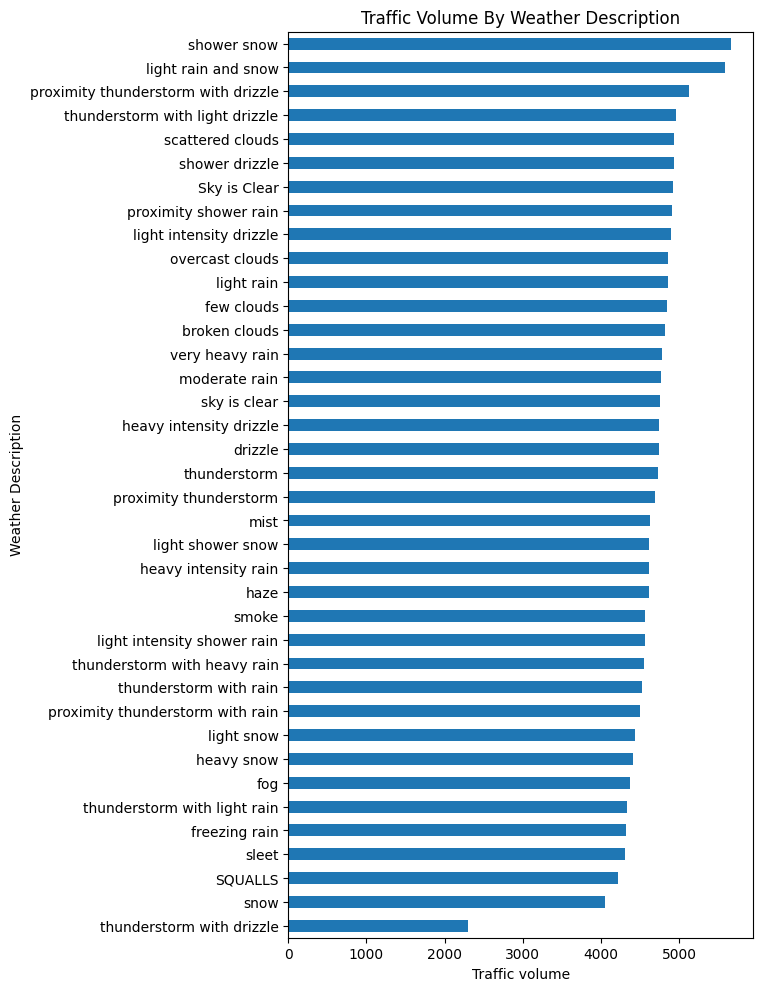

In [24]:
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(6,12))
plt.title('Traffic Volume By Weather Description')
plt.xlabel('Traffic volume')
plt.ylabel('Weather Description')
plt.show()

Where traffic volume exceeds 5,000, it appears that three weather types exist:
- shower snow
- light rain and snow
- proximity thunderstorm with drizzle

It's unclear why these weather types have the highest average traffic values — this seems to be bad weather, and not particularly bad. It seems that when the weather is bad but not too dangerous, people are more likely to use their cars than walk or use a bicycle. This leads to higher traffic volumes. However, when the weather is particularly bad, the traffic volume reduces significantly (e.g., 'thunderstorm with drizzle' weather description has a volume of only slightly over 2000 cars). This is likely because when the weather is too dangerous, people are less likely to leave their homes at all, therefore the traffic volume would be less.

## Conclusion

We attempted to identify a few indicators of heavy traffic on the I-94 Interstate highway in this project. We were successful in locating two types of indicators: Time Indicators and Weather Indicators.

Time indicators:

- The traffic is usually heavier during warm months (March–October except July) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

Weather indicators:

- The traffic volume was high (over 5000 cars) when the weather description was: a) 'Shower snow', b) 'Light rain and snow', and c) 'Proximity thunderstorm with drizzle'.
- Bad weather conditions that are not too dangerous lead to heavier traffic, likely because people are more inclined to use their cars but have to drive slower and more carefully.
- Extreme weather descriptions resulted in lower traffic volumes, likely since people are less likely to go out in dangerous weather conditions.